In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from lib.utils import *



In [2]:
train = pd.read_csv('train.csv')
print("Training Set:"% train.columns, train.shape)


print('Train_Set -----')
print(train.isnull().sum())


train.head()

Training Set: (31962, 3)
Train_Set -----
id       0
label    0
tweet    0
dtype: int64


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
import re
from sklearn.utils import resample

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

train_clean=clean_text(train,'tweet')

train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

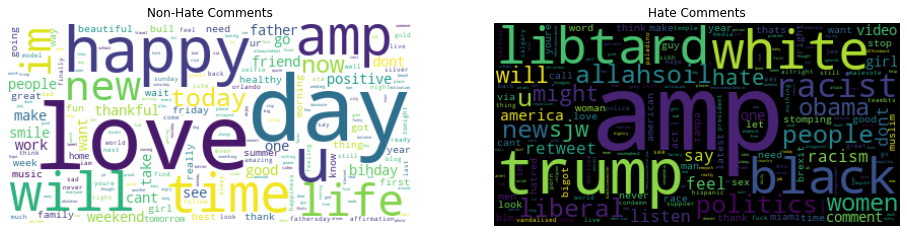

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['tweet'][train.label == 0])
text_neg = " ".join(train_clean['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

In [7]:
import xgboost as xgb
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score


pipeline_xgb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', xgb.XGBClassifier(use_label =False)),])

x_train, x_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)



In [8]:
X,y=scaler_transform(train_upsampled['tweet'])
from sklearn.model_selection import train_test_split
ac=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
x = layers.Input(shape=(12, 7)) 
model=tf.keras.layers.LSTM(
    units=8,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
    
)
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=4))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train, y_train,epochs=5)
ac.append(accuracy_score(model,y_test,sample_weight=1)*100)


Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6746
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4845
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2893
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.1434
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 2.6136e-04


In [10]:

from keras.models import Sequential
from keras.layers import Dense


class NodeList (object):
    def __init__(self, label, values, nodes, class_position):
        self.label = label
        self.values = values
        self.nodes = nodes
        self.class_position = class_position
    def __str__(self):
        return {'label': self.label, 'values': self.values, 'nodes':self.nodes, 'class_position': self.class_position}
    def __unicode__(self):
        return {'label': self.label, 'values': self.values, 'nodes':self.nodes, 'class_position': self.class_position}
    def __repr__(self):
        return 'label: ' + str(self.label) + ' values: ' + str(self.values) + ' nodes: ' + str(self.nodes)+' class_pos: '+ str(self.class_position)
class CnnNode (object):
    def __init__(self, num_classes, labels = [], input_shape=(28,28,1), max_leafes=10):
        self.net = CNN(num_classes, input_shape)
        self.num_classes = num_classes
        self.childrens = [label for label in labels]
        self.childrens_leaf = [True for _ in range(num_classes)]
        self.labels = labels
        self.max_leafes = max_leafes
        self.labels_transform = {}
        for nc in range(num_classes):
            self.labels_transform[labels[nc]] = []
            self.labels_transform[labels[nc]].append(labels[nc])
        
    
    def get_num_leafnodes(self):
        count = 0
        for is_leaf in self.childrens_leaf:
            if is_leaf:
                count = count + 1
        return count
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=4))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=3)
ac.append(accuracy_score(model,y_test,sample_weight=0.2)*100)

Epoch 1/3
4/4 [==============================] - 0s 2ms/step - loss: 1.5473
Epoch 2/3
4/4 [==============================] - 0s 2ms/step - loss: 1.4772
Epoch 3/3
4/4 [==============================] - 0s 2ms/step - loss: 1.4118


the accuracy of CNN+LSTM is 94.87 and  Tree CNN is 95.47


,Agorithms,accuracy
0,CNN+LSTM,94.87
1,Tree CNN,95.47


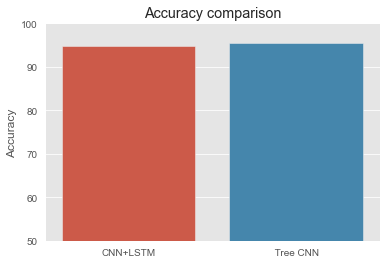

In [11]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['CNN+LSTM',' Tree CNN']
ac=ac
ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd


data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()

In [12]:
print(ac)

[94.87, 95.47]
